In [1]:
# importing libraries

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

#ignoring the warnings while executing codes
import warnings
warnings.filterwarnings("ignore")

#importing Dataset
house = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
house_test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")


In [2]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


****shape method will show us the dimension of the dataset****

In [3]:
house.shape

(1460, 81)

In [4]:
house.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


**Now we categorize the features based on their datatype (int, float, object) and count how many there are**

In [5]:
obj = (house.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (house.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (house.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 43
Integer variables: 35
Float variables: 3


# **Exploratory Data Analysis**

<AxesSubplot:>

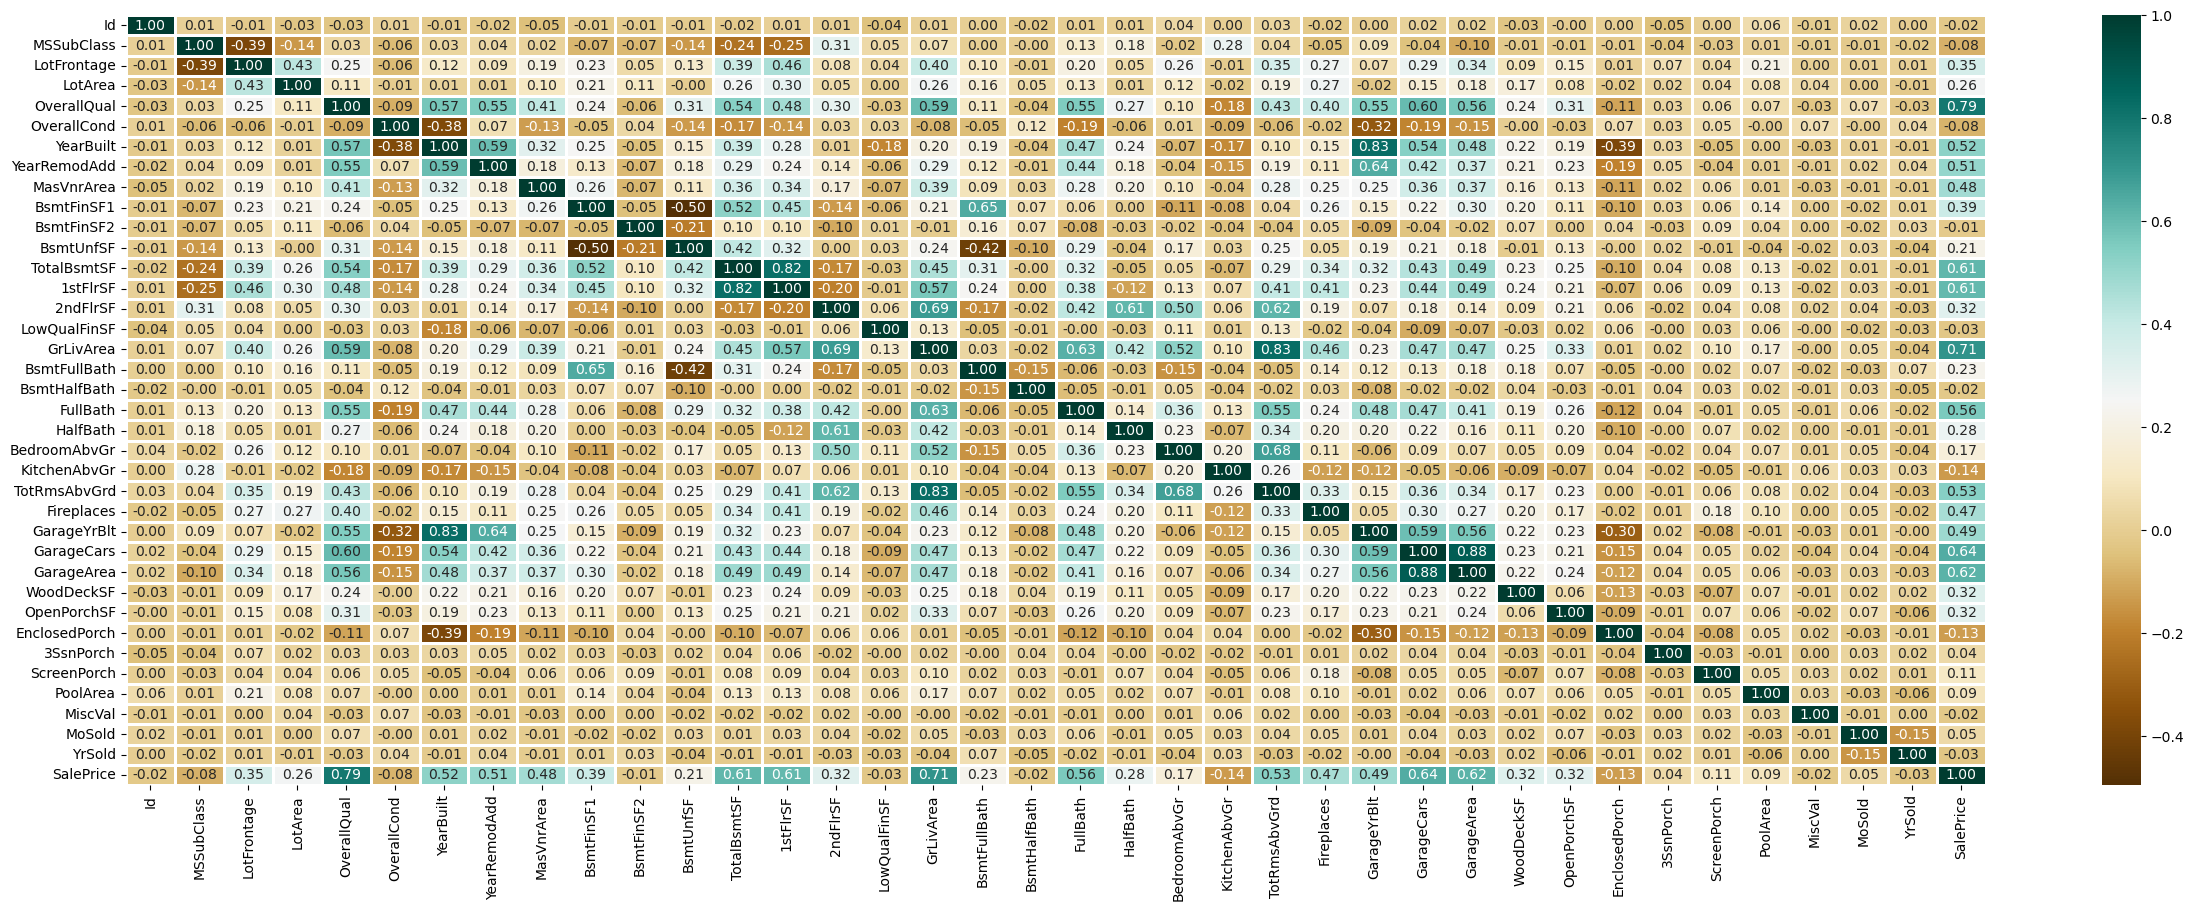

In [6]:
plt.figure(figsize=(30, 10))
sns.heatmap(house.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

****checking the distribution of the target variables ****

according to heatmap some attirbutes like 

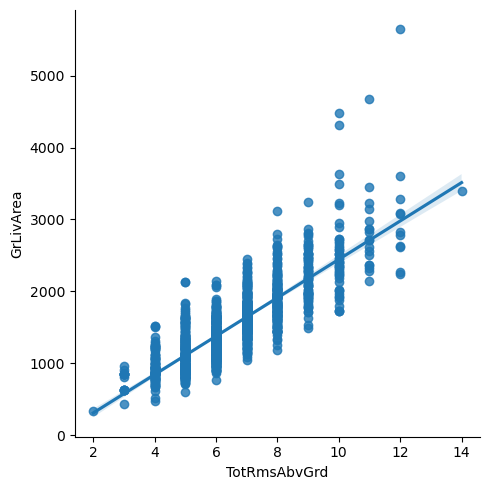

In [7]:
sns.lmplot(data=house,x='TotRmsAbvGrd',y='GrLivArea')

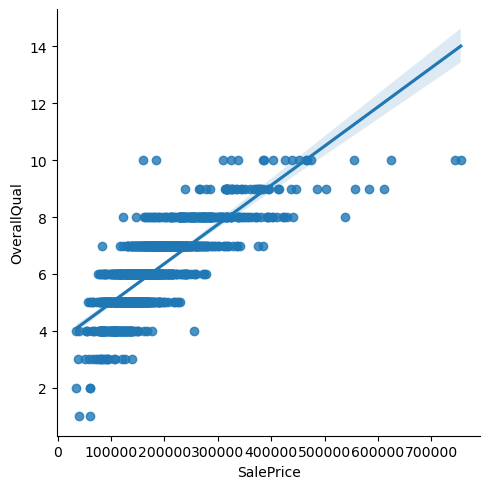

In [8]:
sns.lmplot(data=house,x='SalePrice',y='OverallQual')

In [9]:
house['SalePrice'].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

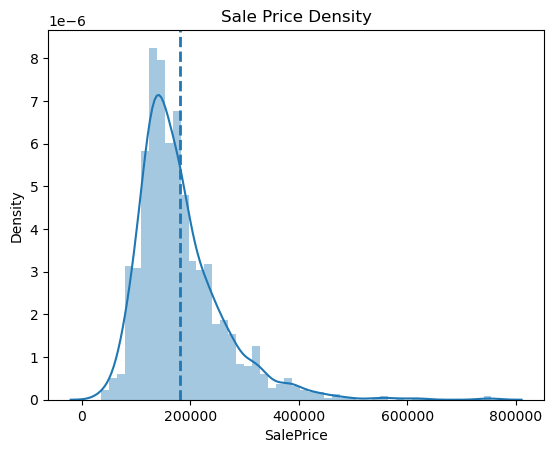

In [10]:
sns.distplot(house['SalePrice'])
plt.axvline(x=house['SalePrice'].mean(), linestyle='--', linewidth=2)
plt.title('Sale Price Density');

*** Let’s draw  barplot for analyzing the different categorical features ***

<AxesSubplot:title={'center':'No. Unique values of Categorical Features'}>

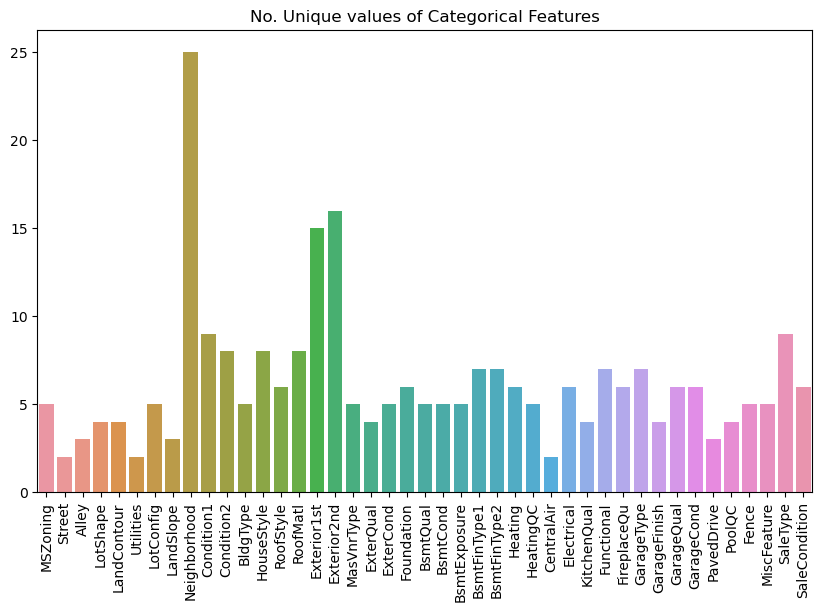

In [11]:
unique_values = []
for col in object_cols:
  unique_values.append(house[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

**#checking missing values
**

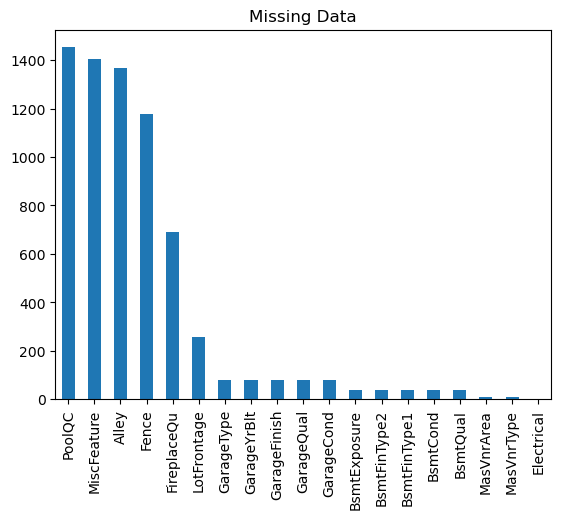

In [12]:
missing = house.isnull().sum()
missing = missing[missing > 0]
missing = missing.sort_values(ascending = False)
missing.plot.bar()
plt.title('Missing Data');

In [13]:
# droping values more than 50%

y = house['SalePrice']
house = house.drop(['Id','Alley','PoolQC','Fence','MiscFeature','SalePrice'],axis=1)
house_test = house_test.drop(['Id','Alley','PoolQC','Fence','MiscFeature'],axis=1)

In [14]:
num_cols = [col for col in house.columns if house[col].dtype in ['float64','int64']]
cat_cols = [col for col in house.columns if house[col].dtype not in ['float64','int64']]

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

house[num_cols] = SimpleImputer().fit_transform(house[num_cols])
house_test[num_cols] = SimpleImputer().fit_transform(house_test[num_cols])

house[num_cols] = MinMaxScaler().fit_transform(house[num_cols])
house_test[num_cols] = MinMaxScaler().fit_transform(house_test[num_cols])

In [16]:
columns_None = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','FireplaceQu','GarageCond',
                'MasVnrType','Electrical','MSZoning','Utilities','Functional','Exterior2nd','KitchenQual','Exterior1st','SaleType']
house[columns_None] = house[columns_None].fillna('none')
house_test[columns_None] = house_test[columns_None].fillna('none')

In [17]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(house[cat_cols])
encoded_cols = list(encoder.get_feature_names(cat_cols))
house[encoded_cols] = encoder.transform(house[cat_cols])

house_test[encoded_cols] = encoder.transform(house_test[cat_cols])


In [18]:
from sklearn.model_selection import train_test_split


# Create training and test sets
X_train,X_test,y_train,y_test = train_test_split(house[num_cols + encoded_cols],
                                                 y,
                                                 test_size=0.25,
                                                 random_state=42)


# **Linear Regression**

In [19]:
from sklearn.linear_model import LinearRegression

model_linear=LinearRegression()

model_linear.fit(X_train,y_train)


LinearRegression()

In [20]:
model_linear.score(X_test,y_test)

-4.879606207089869e+17

In [21]:
predicted = model_linear.predict(X_test)


In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error


RMSE_score = np.sqrt(mean_squared_error(y_test, predicted))
print("RMSE_score :",RMSE_score)

MSE_score = mean_squared_error(y_test, predicted)
print("MSE_score :",MSE_score)

MAPE_score = mean_absolute_percentage_error(y_test, predicted)
print("MAPE_score :",MAPE_score)

MAE_score = mean_absolute_error(y_test, predicted)
print("MAE_score :",MAE_score)

RMSE_score : 58466357449714.445
MSE_score : 3.4183149534377797e+27
MAPE_score : 39495157.93235296
MAE_score : 5505191371647.562


# Random Forest

In [23]:
from sklearn.ensemble import RandomForestRegressor

model_forest=RandomForestRegressor()

model_forest.fit(X_train,y_train)

RandomForestRegressor()

In [24]:
model_forest.score(X_test,y_test)

0.8939819777020744


**Let’s predict our values and compare our results with the test set.**

In [25]:
predicted = model_forest.predict(X_test)


In [26]:


RMSE_score = np.sqrt(mean_squared_error(y_test, predicted))
print("RMSE_score :",RMSE_score)

MSE_score = mean_squared_error(y_test, predicted)
print("MSE_score :",MSE_score)

MAPE_score = mean_absolute_percentage_error(y_test, predicted)
print("MAPE_score :",MAPE_score)

MAE_score = mean_absolute_error(y_test, predicted)
print("MAE_score :",MAE_score)

RMSE_score : 27252.321209665242
MSE_score : 742689011.3147701
MAPE_score : 0.10222089374676394
MAE_score : 16955.37515068493


# Support Vector Machine

In [27]:
from sklearn.svm import SVR

model_svr=SVR()

model_svr.fit(X_train,y_train)


SVR()

In [28]:
predicted_svr = model_svr.predict(X_test)


In [29]:

RMSE_score = np.sqrt(mean_squared_error(y_test, predicted_svr))
print("RMSE_score :",RMSE_score)

MSE_score = mean_squared_error(y_test, predicted_svr)
print("MSE_score :",MSE_score)

MAPE_score = mean_absolute_percentage_error(y_test, predicted_svr)
print("MAPE_score :",MAPE_score)

MAE_score = mean_absolute_error(y_test, predicted_svr)
print("MAE_score :",MAE_score)

RMSE_score : 84754.1458787072
MSE_score : 7183265243.629182
MAPE_score : 0.34194782667832657
MAE_score : 57181.58538640821


In [30]:
data = {'Model Name': ['SVM', 'Linear Reggresion', 'Random Forrest'],
        'RMSE': ["84754","58466357449714","27924"],
        'MSE' : ["7183265243","3.41831495343","804125544"],
        'MAPE': ["0.3419","3949", "0.1009"],
        'MAE' : [57181,550519137164,17023]
       }
df = pd.DataFrame(data)
df1=df.sort_values(by='MAE',ascending=True)
df1

,Model Name,RMSE,MSE,MAPE,MAE
2,Random Forrest,27924,804125544,0.1009,17023
0,SVM,84754,7183265243,0.3419,57181
1,Linear Reggresion,58466357449714,3.41831495343,3949,550519137164


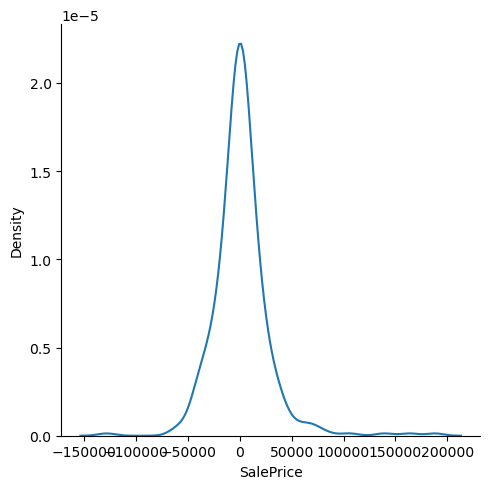

In [31]:
import seaborn as sns

sns.displot((y_test-predicted),kind="kde")

In [32]:
test_preds =  model_forest.predict(house_test[num_cols + encoded_cols])


In [33]:
submission_df = pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")
submission_df['SalePrice'] = test_preds
submission_df.to_csv('submission.csv', index=False)